# WRF Visualizations

Prerequisites:
- !conda install -c conda-forge wrf-python
- !conda install -c anaconda netcdf4
- !conda install -c anaconda basemap

## Basemap visualization

In [1]:
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from wrf import to_np, getvar, smooth2d, latlon_coords, get_basemap, enable_basemap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset as NetCDFFile

enable_basemap()

In [2]:
og = NetCDFFile('data/original_0_4.nc')
og

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE:  OUTPUT FROM WRF V4.1.1 MODEL
    START_DATE: 2021-01-29_12:00:00
    SIMULATION_START_DATE: 2021-01-29_12:00:00
    WEST-EAST_GRID_DIMENSION: 148
    SOUTH-NORTH_GRID_DIMENSION: 148
    BOTTOM-TOP_GRID_DIMENSION: 71
    DX: 1000.0
    DY: 1000.0
    AERCU_OPT: 0
    AERCU_FCT: 1.0
    IDEAL_CASE: 0
    DIFF_6TH_SLOPEOPT: 0
    AUTO_LEVELS_OPT: 2
    DIFF_6TH_THRESH: 0.1
    DZBOT: 50.0
    DZSTRETCH_S: 1.3
    DZSTRETCH_U: 1.1
    SKEBS_ON: 0
    SPEC_BDY_FINAL_MU: 1
    USE_Q_DIABATIC: 0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 3
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 8
    RA_LW_PHYSICS: 1
    RA_SW_PHYSICS: 1
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 4
    BL_PBL_PHYSICS: 5
    CU_PHYSICS: 0
    SF_LAKE_PHYSICS: 0
    SURFACE_INPUT_SOURCE: 3
    SST_UPDATE: 0
    GRID_FDDA: 0
    GFDDA_INTERVAL_M: 0
    GFDDA_END_H: 0
    GRID_SFDDA: 0


## Pressure

In [5]:
len(getvar(og, 'pressure').dims)

3

In [6]:
pre = getvar(og, 'pressure')
pre = pre.isel(bottom_top=0)
pre

<xarray.DataArray 'pressure' (south_north: 147, west_east: 147)>
array([[987.40326, 987.15594, 985.3968 , ..., 946.13837, 950.7629 ,
        956.51324],
       [987.4077 , 987.475  , 987.0922 , ..., 946.10126, 950.7488 ,
        956.02655],
       [985.6139 , 986.8624 , 987.074  , ..., 946.8929 , 951.26605,
        956.0968 ],
       ...,
       [886.6727 , 871.5972 , 861.68396, ..., 942.4061 , 946.7868 ,
        948.78076],
       [883.9404 , 868.6084 , 858.89966, ..., 945.88226, 949.7541 ,
        951.97076],
       [886.1865 , 870.93036, 861.15485, ..., 950.9731 , 954.20325,
        956.14777]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -76.37 -76.35 ... -74.86 -74.85
    XLAT     (south_north, west_east) float32 5.616 5.616 5.616 ... 7.123 7.123
    XTIME    float32 0.0
    Time     datetime64[ns] 2021-01-29T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XYZ
    description:    pressure
    units:          hPa
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=-98.0, moad_cen_lat=5.269996643066406,...
    _FillValue:     1e+20
    missing_value:  1e+20

In [7]:
# Smooth the sea level pressure since it tends to be noisey near the mountains
smooth_pre = smooth2d(pre, 3)
# Get the latitude and longitude coordinates
lats, lons = latlon_coords(pre)

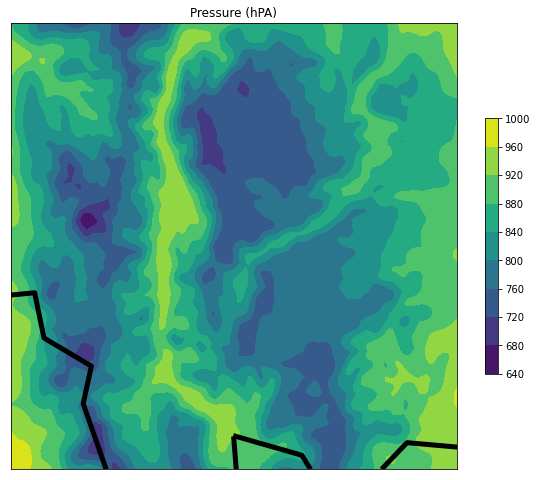

In [8]:
bm = get_basemap(smooth_pre)
# Create a figure that's 10x10
fig = plt.figure(figsize=(10,10))
try:
    m.drawcoastlines(linewidth=0.5)
except:
    pass
bm.drawstates(linewidth=5)
bm.fillcontinents(color='0')
bm.drawcountries(linewidth=5)
# Convert the lats and lons to x and y. Make sure you convert the lats and lons to
# numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
x, y = bm(to_np(lons), to_np(lats))
# Draw the contours and filled contours
#bm.contour(x, y, to_np(smooth_slp), 10, colors="black")
bm.contourf(x, y, to_np(smooth_pre), 10)
# Add a color bar
plt.colorbar(shrink=.47)
plt.title("Pressure (hPA)")
plt.show()

## Temperature

In [9]:
temp = getvar(og, 'temp')
temp

<xarray.DataArray 'temp' (bottom_top: 70, south_north: 147, west_east: 147)>
array([[[297.47015, 297.45828, 297.397  , ..., 294.87585, 295.21954,
         295.55554],
        [297.40997, 297.42578, 297.4433 , ..., 294.83154, 295.2795 ,
         295.52493],
        [297.3201 , 297.29172, 297.3386 , ..., 294.90842, 295.3748 ,
         295.51642],
        ...,
        [289.64258, 291.05606, 289.65195, ..., 293.68985, 293.953  ,
         293.42892],
        [288.29443, 290.59875, 289.60437, ..., 293.92264, 294.1444 ,
         293.6957 ],
        [288.54358, 291.16055, 290.94412, ..., 294.40442, 294.41486,
         293.9709 ]],

       [[297.16177, 297.14117, 297.08606, ..., 294.48254, 294.82812,
         295.16257],
        [297.09766, 297.11136, 297.1309 , ..., 294.44006, 294.88425,
         295.13147],
        [297.00674, 296.97586, 297.02243, ..., 294.51904, 294.98425,
         295.12326],
...
        [202.74545, 202.74243, 202.7394 , ..., 202.35701, 202.35583,
         202.35469],
        [202.73787, 202.73486, 202.73149, ..., 202.34921, 202.348  ,
         202.3469 ],
        [202.7301 , 202.72672, 202.72385, ..., 202.34192, 202.34073,
         202.33916]],

       [[204.72809, 204.73027, 204.73254, ..., 205.05766, 205.05948,
         205.0617 ],
        [204.72285, 204.72508, 204.72733, ..., 205.06364, 205.06554,
         205.0678 ],
        [204.71768, 204.7199 , 204.72256, ..., 205.06943, 205.07137,
         205.07375],
        ...,
        [204.36024, 204.35687, 204.35353, ..., 204.01772, 204.01929,
         204.02058],
        [204.35301, 204.34972, 204.34642, ..., 204.00983, 204.01137,
         204.01268],
        [204.3456 , 204.34232, 204.3391 , ..., 204.00204, 204.00313,
         204.00485]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -76.37 -76.35 ... -74.86 -74.85
    XLAT     (south_north, west_east) float32 5.616 5.616 5.616 ... 7.123 7.123
    XTIME    float32 0.0
    Time     datetime64[ns] 2021-01-29T12:00:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XYZ
    description:    temperature
    units:          K
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=-98.0, moad_cen_lat=5.269996643066406,...
    _FillValue:     1e+20
    missing_value:  1e+20

In [10]:
temp = temp.isel(bottom_top=0)

In [11]:
# Smooth the sea level pressure since it tends to be noisey near the mountains
smooth_temp = smooth2d(temp, 3)
# Get the latitude and longitude coordinates
lats, lons = latlon_coords(temp)

In [12]:
smooth_temp

<xarray.DataArray 'smooth_temp' (south_north: 147, west_east: 147)>
array([[297.47015, 297.45828, 297.397  , ..., 294.87585, 295.21954,
        295.55554],
       [297.40997, 297.4039 , 297.40558, ..., 294.86768, 295.2261 ,
        295.52493],
       [297.3201 , 297.35117, 297.42303, ..., 294.8966 , 295.2536 ,
        295.51642],
       ...,
       [289.64258, 289.99213, 289.6269 , ..., 293.52408, 293.65204,
        293.42892],
       [288.29443, 289.9543 , 289.97287, ..., 293.81946, 293.93964,
        293.6957 ],
       [288.54358, 291.16055, 290.94412, ..., 294.40442, 294.41486,
        293.9709 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -76.37 -76.35 ... -74.86 -74.85
    XLAT     (south_north, west_east) float32 5.616 5.616 5.616 ... 7.123 7.123
    XTIME    float32 0.0
    Time     datetime64[ns] 2021-01-29T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XYZ
    description:    temperature
    units:          K
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=-98.0, moad_cen_lat=5.269996643066406,...
    _FillValue:     1e+20
    missing_value:  1e+20
    passes:         3
    cenweight:      2.0

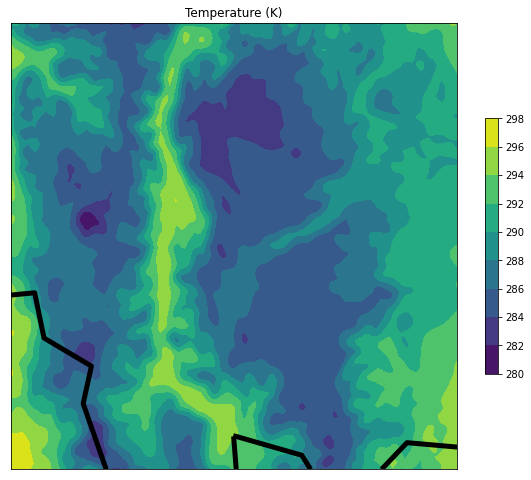

In [13]:
bm = get_basemap(smooth_temp)
# Create a figure that's 10x10
fig = plt.figure(figsize=(10,10))
try:
    m.drawcoastlines(linewidth=0.5)
except:
    pass
bm.drawstates(linewidth=5)
bm.fillcontinents(color='0')
bm.drawcountries(linewidth=5)
# Convert the lats and lons to x and y. Make sure you convert the lats and lons to
# numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
x, y = bm(to_np(lons), to_np(lats))
# Draw the contours and filled contours
#bm.contour(x, y, to_np(smooth_slp), 10, colors="black")
bm.contourf(x, y, to_np(smooth_temp), 10)
# Add a color bar
plt.colorbar(shrink=.47)
plt.title("Temperature (K)")
plt.show()

## Sea level pressure

In [14]:
# Get the sea level pressure
slp = getvar(og, "slp")
# Smooth the sea level pressure since it tends to be noisey near the mountains
smooth_slp = smooth2d(slp, 3)
# Get the latitude and longitude coordinates
lats, lons = latlon_coords(slp)

In [15]:
smooth_slp

<xarray.DataArray 'smooth_slp' (south_north: 147, west_east: 147)>
array([[1014.61145, 1014.7217 , 1014.69305, ..., 1013.5057 , 1013.6638 ,
        1013.7911 ],
       [1014.6234 , 1014.6862 , 1014.7344 , ..., 1013.4885 , 1013.6715 ,
        1013.80774],
       [1014.58105, 1014.6689 , 1014.76825, ..., 1013.4947 , 1013.68134,
        1013.79956],
       ...,
       [1012.6637 , 1012.66864, 1012.54395, ..., 1013.1817 , 1013.1541 ,
        1012.93024],
       [1012.3552 , 1012.59753, 1012.5926 , ..., 1013.2861 , 1013.26   ,
        1013.0559 ],
       [1012.32684, 1012.7623 , 1012.8789 , ..., 1013.5524 , 1013.4268 ,
        1013.12006]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 -76.37 -76.35 ... -74.86 -74.85
    XLAT     (south_north, west_east) float32 5.616 5.616 5.616 ... 7.123 7.123
    XTIME    float32 0.0
    Time     datetime64[ns] 2021-01-29T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    description:  sea level pressure
    units:        hPa
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   Mercator(stand_lon=-98.0, moad_cen_lat=5.269996643066406, t...
    passes:       3
    cenweight:    2.0

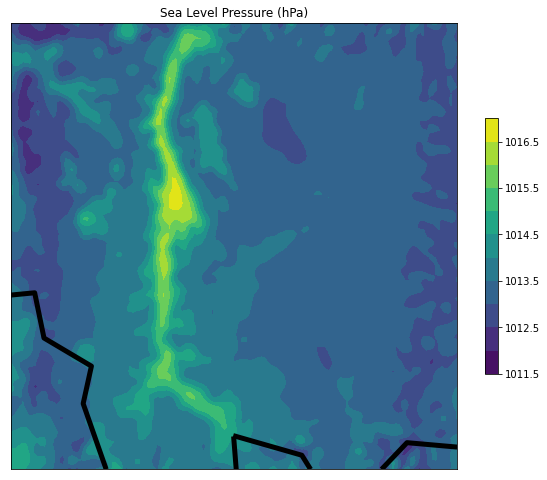

In [16]:
# Get the basemap projection object
bm = get_basemap(smooth_slp)
# Create a figure that's 10x10
fig = plt.figure(figsize=(10,10))
try:
    m.drawcoastlines(linewidth=0.5)
except:
    pass
bm.drawstates(linewidth=5)
bm.fillcontinents(color='0')
bm.drawcountries(linewidth=5)
# Convert the lats and lons to x and y. Make sure you convert the lats and lons to
# numpy arrays via to_np, or basemap crashes with an undefined RuntimeError.
x, y = bm(to_np(lons), to_np(lats))
# Draw the contours and filled contours
#bm.contour(x, y, to_np(smooth_slp), 10, colors="black")
bm.contourf(x, y, to_np(smooth_slp), 10)
# Add a color bar
plt.colorbar(shrink=.47)
plt.title("Sea Level Pressure (hPa)")
plt.show()